# <center>Using SQL with Python and Pandas via pandasql</center>
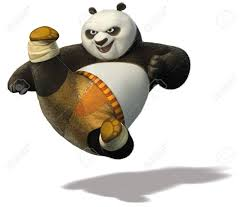
# <center>Approach 1:  Just the basics using pandas</center>

### Documentation at: https://pypi.org/project/pysqldf/

### Use Cases
- Data fits in memory
- Volume of data not a performance issue
- Ease of using SQL
- Don't need a fully functional SQL Server database

### https://github.com/yhat/pandasql/tree/master/examples

In [1]:
import pandas as pd
from pandasql import sqldf
from pandasql import load_births

births = load_births()

print(sqldf("SELECT * FROM births where births > 250000 limit 5;", locals()))

                         date  births
0  1975-01-01 00:00:00.000000  265775
1  1975-03-01 00:00:00.000000  268849
2  1975-05-01 00:00:00.000000  254545
3  1975-06-01 00:00:00.000000  254096
4  1975-07-01 00:00:00.000000  275163


## Let's try a query that spans multiple lines...

### Note:  This is standard ANSI SQL.

In [2]:
q = """
      select
        date(date) as DOB,
        sum(births) as "Total Births"
      from
        births
      group by
        date
        limit 10;  
"""

print(sqldf(q, locals()))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


In [3]:
print(sqldf(q, globals()))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


In [4]:
# locals vs. globals and making calling pysqldf a bit easier...

def pysqldf(q):
    "add this to your script if you get tired of calling locals()"
    return sqldf(q, globals())

### Note:  RIGHT and FULL OUTER JOINs are not currently supported

In [5]:
print(pysqldf(q))

          DOB  Total Births
0  1975-01-01        265775
1  1975-02-01        241045
2  1975-03-01        268849
3  1975-04-01        247455
4  1975-05-01        254545
5  1975-06-01        254096
6  1975-07-01        275163
7  1975-08-01        281300
8  1975-09-01        270738
9  1975-10-01        265494


## Let's use our own data...
## We'll use pandas to load it in...

In [6]:
pwd

'D:\\Python\\PythonSQL\\Notebook'

In [7]:
import pandas as pd

filepath = './Data/'

dfcustomer = pd.read_csv(filepath + 'DimCustomer.csv')

In [8]:
dfcustomer.head(3)

CustomerKey  GeographyKey CustomerAlternateKey Title FirstName MiddleName  \
0        11000            26           AW00011000   NaN       Jon          V   
1        11001            37           AW00011001   NaN    Eugene          L   
2        11002            31           AW00011002   NaN     Ruben        NaN   

  LastName  NameStyle   BirthDate MaritalStatus  ... EnglishOccupation  \
0     Yang          0  1971-10-06             M  ...      Professional   
1    Huang          0  1976-05-10             S  ...      Professional   
2   Torres          0  1971-02-09             M  ...      Professional   

  SpanishOccupation FrenchOccupation  HouseOwnerFlag  NumberCarsOwned  \
0       Profesional            Cadre               1                0   
1       Profesional            Cadre               0                1   
2       Profesional            Cadre               1                1   

       AddressLine1 AddressLine2                Phone DateFirstPurchase  \
0   3761 N. 14th St          NaN  1 (11) 500 555-0162        2011-01-19   
1        2243 W St.          NaN  1 (11) 500 555-0110        2011-01-15   
2  5844 Linden Land          NaN  1 (11) 500 555-0184        2011-01-07   

  CommuteDistance  
0       1-2 Miles  
1       0-1 Miles  
2       2-5 Miles  

[3 rows x 29 columns]

## Eliminating the index...

In [9]:
dfcustomer.set_index('CustomerKey',inplace=True)

In [10]:
dfcustomer

GeographyKey CustomerAlternateKey Title  FirstName MiddleName  \
CustomerKey                                                                  
11000                  26           AW00011000   NaN        Jon          V   
11001                  37           AW00011001   NaN     Eugene          L   
11002                  31           AW00011002   NaN      Ruben        NaN   
11003                  11           AW00011003   NaN    Christy        NaN   
11004                  19           AW00011004   NaN  Elizabeth        NaN   
...                   ...                  ...   ...        ...        ...   
29479                 209           AW00029479   NaN      Tommy          L   
29480                 248           AW00029480   NaN       Nina          W   
29481                 120           AW00029481   NaN       Ivan        NaN   
29482                 179           AW00029482   NaN    Clayton        NaN   
29483                 217           AW00029483   NaN      Jésus          L   

            LastName  NameStyle   BirthDate MaritalStatus Suffix  ...  \
CustomerKey                                                       ...   
11000           Yang          0  1971-10-06             M    NaN  ...   
11001          Huang          0  1976-05-10             S    NaN  ...   
11002         Torres          0  1971-02-09             M    NaN  ...   
11003            Zhu          0  1973-08-14             S    NaN  ...   
11004        Johnson          0  1979-08-05             S    NaN  ...   
...              ...        ...         ...           ...    ...  ...   
29479           Tang          0  1969-06-30             M    NaN  ...   
29480           Raji          0  1977-05-06             S    NaN  ...   
29481           Suri          0  1965-07-04             S    NaN  ...   
29482          Zhang          0  1964-09-01             M    NaN  ...   
29483        Navarro          0  1965-06-06             M    NaN  ...   

            EnglishOccupation SpanishOccupation  FrenchOccupation  \
CustomerKey                                                         
11000            Professional       Profesional             Cadre   
11001            Professional       Profesional             Cadre   
11002            Professional       Profesional             Cadre   
11003            Professional       Profesional             Cadre   
11004            Professional       Profesional             Cadre   
...                       ...               ...               ...   
29479                Clerical    Administrativo           Employé   
29480                Clerical    Administrativo           Employé   
29481                Clerical    Administrativo           Employé   
29482                Clerical    Administrativo           Employé   
29483                Clerical    Administrativo           Employé   

             HouseOwnerFlag  NumberCarsOwned               AddressLine1  \
CustomerKey                                                               
11000                     1                0            3761 N. 14th St   
11001                     0                1                 2243 W St.   
11002                     1                1           5844 Linden Land   
11003                     0                1           1825 Village Pl.   
11004                     1                4        7553 Harness Circle   
...                     ...              ...                        ...   
29479                     1                0          111, rue Maillard   
29480                     1                0          9 Katherine Drive   
29481                     0                0                Knaackstr 4   
29482                     1                0     1080, quai de Grenelle   
29483                     1                0  244, rue de la Centenaire   

            AddressLine2                Phone DateFirstPurchase  \
CustomerKey                                                       
11000                NaN  1 (11) 500 555

In [11]:
pysqldf("select * from dfcustomer;")

CustomerKey  GeographyKey CustomerAlternateKey Title  FirstName  \
0            11000            26           AW00011000  None        Jon   
1            11001            37           AW00011001  None     Eugene   
2            11002            31           AW00011002  None      Ruben   
3            11003            11           AW00011003  None    Christy   
4            11004            19           AW00011004  None  Elizabeth   
...            ...           ...                  ...   ...        ...   
18479        29479           209           AW00029479  None      Tommy   
18480        29480           248           AW00029480  None       Nina   
18481        29481           120           AW00029481  None       Ivan   
18482        29482           179           AW00029482  None    Clayton   
18483        29483           217           AW00029483  None      Jésus   

      MiddleName LastName  NameStyle   BirthDate MaritalStatus  ...  \
0              V     Yang          0  1971-10-06             M  ...   
1              L    Huang          0  1976-05-10             S  ...   
2           None   Torres          0  1971-02-09             M  ...   
3           None      Zhu          0  1973-08-14             S  ...   
4           None  Johnson          0  1979-08-05             S  ...   
...          ...      ...        ...         ...           ...  ...   
18479          L     Tang          0  1969-06-30             M  ...   
18480          W     Raji          0  1977-05-06             S  ...   
18481       None     Suri          0  1965-07-04             S  ...   
18482       None    Zhang          0  1964-09-01             M  ...   
18483          L  Navarro          0  1965-06-06             M  ...   

      EnglishOccupation SpanishOccupation FrenchOccupation  HouseOwnerFlag  \
0          Professional       Profesional            Cadre               1   
1          Professional       Profesional            Cadre               0   
2          Professional       Profesional            Cadre               1   
3          Professional       Profesional            Cadre               0   
4          Professional       Profesional            Cadre               1   
...                 ...               ...              ...             ...   
18479          Clerical    Administrativo          Employé               1   
18480          Clerical    Administrativo          Employé               1   
18481          Clerical    Administrativo          Employé               0   
18482          Clerical    Administrativo          Employé               1   
18483          Clerical    Administrativo          Employé               1   

       NumberCarsOwned               AddressLine1 AddressLine2  \
0                    0            3761 N. 14th St         None   
1                    1                 2243 W St.         None   
2                    1           5844 Linden Land         None   
3                    1           1825 Village Pl.         None   
4                    4        7553 Harness Circle         None   
...                ...                        ...          ...   
18479                0          111, rue Maillard         None   
18480                0          9 Katherine Drive         None   
18481                0                Knaackstr 4         None   
18482                0     1080, quai de Grenelle         None   
18483                0  244, rue de la Centenaire         None   

                     Phone DateFirstPurchase CommuteDistance  
0      1 (11) 500 555-0162        2011-01-19       1-2 Miles  
1      1 (11) 500 555-0110        2011-01-15       0-1 Miles  
2      1 (11) 500 555-0184        2011-01-07       2-5 Miles  
3      1 (11) 500 555-0162        2010-12-29      5-10 Miles  
4      1 (11) 500 555-0131        2011-01-23       1-2 Miles  
...                    ...               ...             ...  
18479  1 (11) 500 555-0136        2012-09-04       0-1 Miles  
18480  1 (11) 500 555-0146     

In [12]:
dfinternetsales = pd.read_csv(filepath + 'FactInternetSales.csv')
dfinternetsales.dtypes

ProductKey                 int64
OrderDateKey               int64
DueDateKey                 int64
ShipDateKey                int64
CustomerKey                int64
PromotionKey               int64
CurrencyKey                int64
SalesTerritoryKey          int64
SalesOrderNumber          object
SalesOrderLineNumber       int64
RevisionNumber             int64
OrderQuantity              int64
UnitPrice                float64
ExtendedAmount           float64
UnitPriceDiscountPct       int64
DiscountAmount             int64
ProductStandardCost      float64
TotalProductCost         float64
SalesAmount              float64
TaxAmt                   float64
Freight                  float64
CarrierTrackingNumber    float64
CustomerPONumber         float64
OrderDate                 object
DueDate                   object
ShipDate                  object
dtype: object

In [13]:
import pandas as pd
from pandasql import sqldf

print(pysqldf('''select FirstName, LastName, EnglishOccupation as "Job Title" from dfcustomer 
              order by LastName, FirstName limit 5'''))

   FirstName LastName       Job Title
0      Aaron    Adams  Skilled Manual
1       Adam    Adams      Management
2       Alex    Adams  Skilled Manual
3  Alexandra    Adams    Professional
4    Allison    Adams        Clerical


In [14]:
#  Joining dataframes with SQL

query = '''select * 
           from dfcustomer                     c
           left outer join dfinternetsales     s
                on (c.CustomerKey = s.CustomerKey) limit 3'''

pysqldf(query)

CustomerKey  GeographyKey CustomerAlternateKey Title FirstName MiddleName  \
0        11000            26           AW00011000  None       Jon          V   
1        11000            26           AW00011000  None       Jon          V   
2        11000            26           AW00011000  None       Jon          V   

  LastName  NameStyle   BirthDate MaritalStatus  ... ProductStandardCost  \
0     Yang          0  1971-10-06             M  ...             13.0863   
1     Yang          0  1971-10-06             M  ...           1912.1544   
2     Yang          0  1971-10-06             M  ...           1265.6195   

  TotalProductCost SalesAmount    TaxAmt  Freight  CarrierTrackingNumber  \
0          13.0863       34.99    2.7992   0.8748                   None   
1        1912.1544     3399.99  271.9992  84.9998                   None   
2        1265.6195     2319.99  185.5992  57.9998                   None   

  CustomerPONumber                OrderDate                  DueDate  \
0             None  2013-05-03 00:00:00.000  2013-05-15 00:00:00.000   
1             None  2011-01-19 00:00:00.000  2011-01-31 00:00:00.000   
2             None  2013-01-18 00:00:00.000  2013-01-30 00:00:00.000   

                  ShipDate  
0  2013-05-10 00:00:00.000  
1  2011-01-26 00:00:00.000  
2  2013-01-25 00:00:00.000  

[3 rows x 55 columns]